In [1]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from glob import glob
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

import os
# import cv2
from PIL import Image
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
from pathlib import Path

if os.name == 'nt':
    file_path = 'C:\\JL\\Master\\DSE_I2100_Applied Machine Learning and Data Mining\\Final_Project\\lgg-mri-segmentation\\'
else:
    file_path = os.path.join(os.path.expanduser("~"), "Downloads/")

In [3]:
mask_img = glob(file_path + os.path.join('kaggle_3m','*','*_mask*'))
train_img = [file.replace('_mask', '') for file in mask_img]

In [4]:
def label(mask):
    value = np.max(imread(mask))
    return '1' if value > 0 else '0'
df = pd.DataFrame({"image": train_img,
                   "mask": mask_img,
                  "label":[label(x) for x in mask_img]})

In [5]:
len(train_img)

3929

In [6]:
df.head()

,image,mask,label
0,C:\JL\Master\DSE_I2100_Applied Machine Learnin...,C:\JL\Master\DSE_I2100_Applied Machine Learnin...,0
1,C:\JL\Master\DSE_I2100_Applied Machine Learnin...,C:\JL\Master\DSE_I2100_Applied Machine Learnin...,1
2,C:\JL\Master\DSE_I2100_Applied Machine Learnin...,C:\JL\Master\DSE_I2100_Applied Machine Learnin...,1
3,C:\JL\Master\DSE_I2100_Applied Machine Learnin...,C:\JL\Master\DSE_I2100_Applied Machine Learnin...,1
4,C:\JL\Master\DSE_I2100_Applied Machine Learnin...,C:\JL\Master\DSE_I2100_Applied Machine Learnin...,1


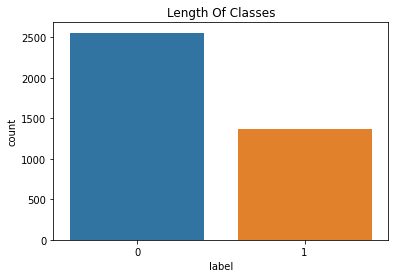

In [7]:
sns.countplot(data=df,x=df['label'])
plt.title('Length Of Classes')
plt.show()

# EDA

In [8]:
# Save images to a list
from skimage.color import rgb2gray
from skimage.io import imread
IMAGE_LIST = [ imread(path) for path in df["image"]  ]
GRAY_IMAGE_LIST = [rgb2gray(rgb_img) for rgb_img in IMAGE_LIST]

IMAGE_LIST = np.array(IMAGE_LIST)
GRAY_IMAGE_LIST = np.array(GRAY_IMAGE_LIST)

In [9]:
IMAGE_LIST.shape

(3929, 256, 256, 3)

## Inspect mage size

Text(0.5, 1.0, 'Histogram of image height')

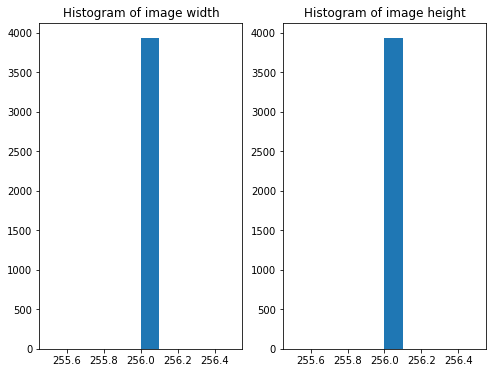

In [10]:
IMAGE_WIDTH_LIST = []
IMAGE_HEIGHT_LIST = []

for path in df['image']:
  IMAGE_WIDTH_LIST.append(imread(path).shape[0])
  IMAGE_HEIGHT_LIST.append(imread(path).shape[1])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))
width_hist = axes[0].hist(IMAGE_WIDTH_LIST)
height_hist = axes[1].hist(IMAGE_HEIGHT_LIST)
axes[0].set_title("Histogram of image width")
axes[1].set_title("Histogram of image height")

## View first 5 images

In [11]:
def show_image_and_mask(img_path, mask_path):
    rgb_img = imread(img_path)
    gray_img = rgb2gray(rgb_img)
    mask_img = imread(mask_path)

    fig, axes = plt.subplots(1, 3, figsize=(10, 8))
    ax = axes.ravel()
    ax[0].imshow(rgb_img)
    ax[0].set_title("Original")
    ax[1].imshow(gray_img, cmap=plt.cm.gray)
    ax[1].set_title("Grayscale")
    ax[2].imshow(mask_img)
    ax[2].set_title("Mask")
    fig.tight_layout()

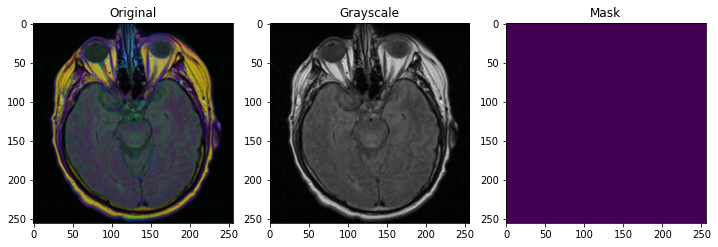

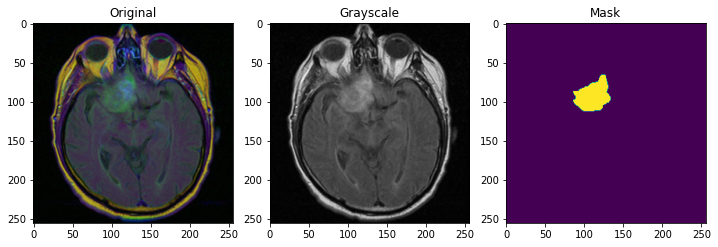

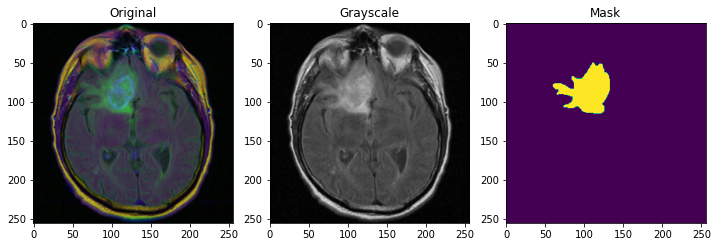

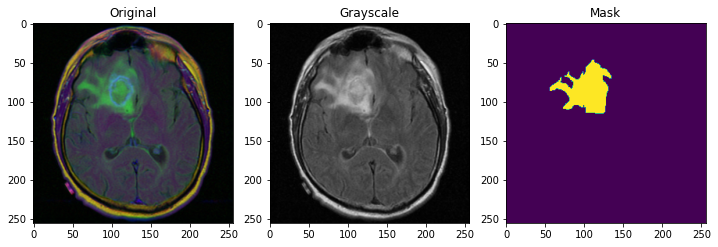

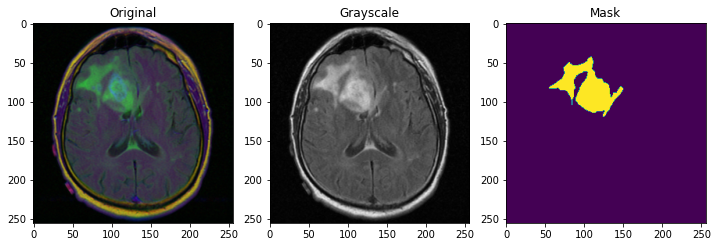

In [12]:
for idx in range(5):
    test_img = df.iloc[idx, 0]
    test_img_mask = df.iloc[idx, 1]
    show_image_and_mask(test_img, test_img_mask)

## Histogram of pixels

Text(0.5, 1.0, 'Histogram of pixels in gray images')

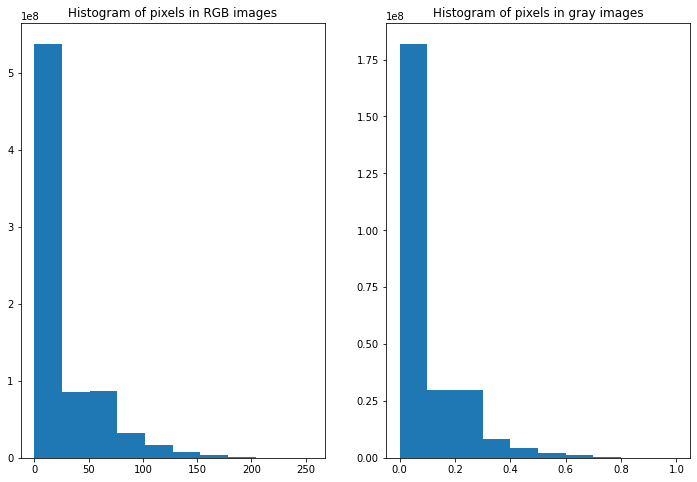

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
rgb_pixel_hist = axes[0].hist(IMAGE_LIST.reshape(-1))
gray_pixel_hist = axes[1].hist(GRAY_IMAGE_LIST.reshape(-1))
axes[0].set_title("Histogram of pixels in RGB images")
axes[1].set_title("Histogram of pixels in gray images")

# Preliminary Test

In [14]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense


In [25]:
dataset = IMAGE_LIST
label = np.array(df["label"].values).astype(int)

In [26]:
print(dataset.shape)
print(label.shape)

(3929, 256, 256, 3)
(3929,)


In [28]:
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)

In [29]:
#from keras.utils import normalize
#X_train = normalize(X_train, axis=1)
#X_test = normalize(X_test, axis=1)
X_train = X_train / 255.
X_test = X_test / 255.

In [30]:
INPUT_SHAPE = (256, 256, 3)   #change to (SIZE, SIZE, 3)


model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid')) 

In [31]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',             #also try adam
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 activation_6 (Activation)   (None, 125, 125, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                  

In [32]:
history = model.fit(X_train, 
                         y_train, 
                         batch_size = 200, 
                         verbose = 1, 
                         epochs = 10,      
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )

Epoch 1/10
16/16 [==============================] - 120s 7s/step - loss: 0.7195 - accuracy: 0.6386 - val_loss: 0.4881 - val_accuracy: 0.7468
Epoch 2/10
16/16 [==============================] - 102s 6s/step - loss: 0.4712 - accuracy: 0.7480 - val_loss: 0.4135 - val_accuracy: 0.7901
Epoch 3/10
16/16 [==============================] - 104s 6s/step - loss: 0.4301 - accuracy: 0.7795 - val_loss: 0.4014 - val_accuracy: 0.8053
Epoch 4/10
16/16 [==============================] - 100s 6s/step - loss: 0.4138 - accuracy: 0.7833 - val_loss: 0.3868 - val_accuracy: 0.8066
Epoch 5/10
16/16 [==============================] - 99s 6s/step - loss: 0.3926 - accuracy: 0.8015 - val_loss: 0.3791 - val_accuracy: 0.8053
Epoch 6/10
16/16 [==============================] - 102s 6s/step - loss: 0.3718 - accuracy: 0.8126 - val_loss: 0.3760 - val_accuracy: 0.8053
Epoch 7/10
16/16 [==============================] - 98s 6s/step - loss: 0.3473 - accuracy: 0.8301 - val_loss: 0.3820 - val_accuracy: 0.8168
Epoch 8/10
16/1

In [33]:
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

25/25 [==============================] - 6s 251ms/step - loss: 0.2932 - accuracy: 0.8664
Accuracy =  86.64122223854065 %
